# ФИО студента: Папанов Роман Владимирович

# Номер группы: 19-ИВТ-3

# Вариант: 6

# Задание: Occupancy

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


# 1 пункт
<b>Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных</b>

1. date time - <b>Дата-время (год - месяц - день - час : минута : секунда)</b> 
2. Temperature - <b>Температура (по Цельсию)</b>
3. Relative Humidity - <b>Относительная влажность (%)</b>
4. Light - <b>Свет (в люксах)</b>
5. CO2 - <b>Углекислый газ  (в ppm)</b>
6. Humidity Ratio - <b>Удельная влажность</b>
7. Occupancy - <b>Занятость (0 - незанятый статус, 1 - занятый статус)</b>

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

DATA_TIME = 'date'
TEMPERATURE = 'Temperature'
RELATIVE_HUMIDITY = 'Humidity'
LIGHT = 'Light'
CO2 = 'CO2'
HUMIDITY_RATIO = 'HumidityRatio'
OCCUPANCY = 'Occupancy'
df = pd.read_csv('datatraining.txt')
df_pandas = pd.DataFrame(df)
df_pandas.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [156]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [157]:
df_pandas.shape


(8143, 7)

# 2 пункт
<b>Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции</b>

In [158]:
print("До удаления дубликатов:", df_pandas.shape)
df_pandas = df_pandas.drop_duplicates()
print("После удаления дубликатов:", df_pandas.shape)

До удаления дубликатов: (8143, 7)
После удаления дубликатов: (8143, 7)


Дубликаты не найдены 

# 3 пункт
<b>Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)</b>

<AxesSubplot:xlabel='Occupancy', ylabel='count'>

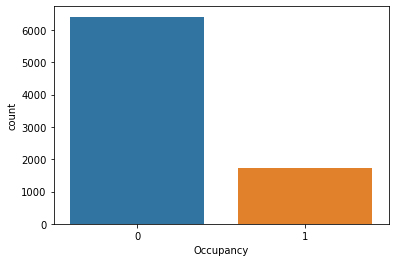

In [159]:
sns.countplot(data=df_pandas, x=OCCUPANCY)

Объем данных по каждому классу отличается. Классы несбалансированы. ROC-кривую, поскольку она дает адекватную оценку качества работы алгоритма, где классы несбалансированы. 

# 4 пункт

<b>Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования</b> 

<AxesSubplot:>

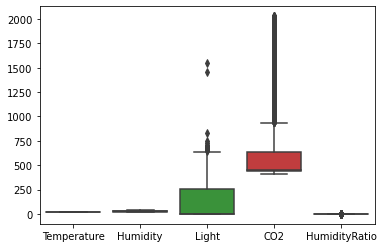

In [160]:
quan_atrib = [TEMPERATURE, RELATIVE_HUMIDITY, LIGHT, CO2, HUMIDITY_RATIO]
sns.boxplot(data = df_pandas[quan_atrib])

<b>Способ масшатбирования - нормализация</b>

<AxesSubplot:>

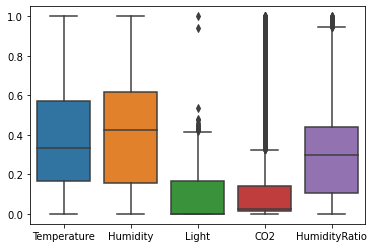

In [161]:
df_pandas[quan_atrib] = preprocessing.MinMaxScaler().fit_transform(df_pandas[quan_atrib].values.astype(float))
sns.boxplot(data = df_pandas[quan_atrib])

# 5 пункт
<b>Выполните замену категориальных признаков; выберите и обоснуйте способ замены</b>

Замена не требуется, так как категориальные признаки отсутсвуют

# 6 пункт 
<b>Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)</b>

<AxesSubplot:>

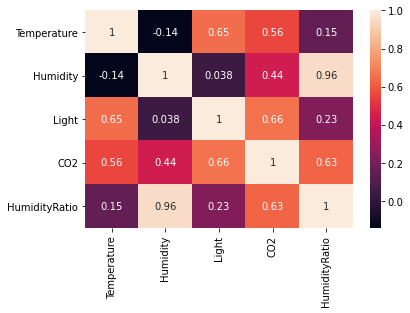

In [162]:
df_corr = df_pandas.corr()
df_corr = df.drop('Occupancy', axis=1).corr()
sns.heatmap(df_corr, annot = True)

# 7 пункт
<b> Заполните пропущенные значения в данных </b>

In [163]:
df_pandas.count()

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

Пропусков нет

# 8 пункт
<b>Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.</b>

In [164]:
df_test = pd.read_csv('datatest2.txt')
df_test.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


Нормализуем

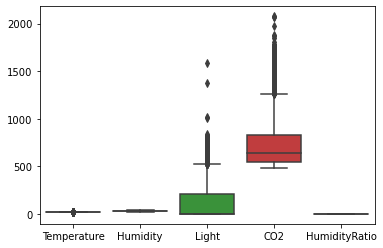

In [165]:
sns.boxplot(data = df_test[quan_atrib])
plt.show()

In [166]:
numerical_columns = [i for i in df_test.columns[1:6] if df_test[i].dtype.name != 'object']
categorial_columns = [i for i in df_test.columns[1:6] if df_test[i].dtype.name == 'object']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])
df_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,0.462168,0.525565,0.276618,0.342373,0.700223,1
2,2015-02-11 14:49:00,0.468303,0.518004,0.276618,0.323736,0.695239,1
3,2015-02-11 14:50:00,0.463701,0.524950,0.274510,0.326092,0.700447,1
4,2015-02-11 14:51:00,0.463701,0.524950,0.277672,0.329704,0.700447,1
5,2015-02-11 14:51:59,0.468303,0.525565,0.276618,0.327296,0.703947,1


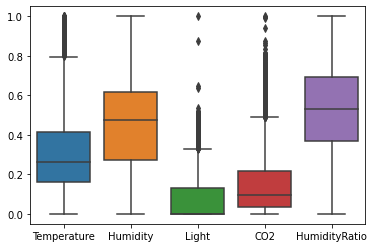

In [167]:
sns.boxplot(data = df_test[quan_atrib])
plt.show()


In [168]:
df_test.shape

(9752, 7)

In [169]:
df_test.count()

date             9752
Temperature      9752
Humidity         9752
Light            9752
CO2              9752
HumidityRatio    9752
Occupancy        9752
dtype: int64

### Реализуем классификацию методом k ближайших соседй

In [170]:
x_train, y_train = df_pandas[numerical_columns + ['Occupancy']].drop('Occupancy', axis=1), df_pandas['Occupancy']
x_test, y_test = df_test[numerical_columns + ['Occupancy']].drop('Occupancy', axis=1), df_test['Occupancy']

In [171]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#найдем оптимальные параметры для классификатора
#n_neighbors - количество соседей
knn_grid = GridSearchCV(knn, dict(n_neighbors = [x for x in range(1,50)]))
knn_grid.fit(x_train, y_train)
selected_n_neighbors = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_
print('best train score: ', best_score,'| at neighbors number: ', selected_n_neighbors)

#создаем модель knn по нашим оптимальным данным
knn = KNeighborsClassifier(n_neighbors=selected_n_neighbors)
#тренируем ее
knn.fit(x_train, y_train)
#смотрим в каком проценте случаев классификатор дает верный результат
best_score  = np.mean(y_test  == knn.predict(x_test))
print('test score: ', best_score)

best train score:  0.9328218726008781 | at neighbors number:  44
test score:  0.9487284659557014


### Линейный классификатор (персептрон)

In [172]:
from sklearn.linear_model import Perceptron
slf = Perceptron()
#найдем оптимальные параметры для классификатора
#alfa - Константа, которая умножает член регуляризации
#max_iter - Максимальное количество проходов над данными обучения (иначе говоря, эпохи)
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(x_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score,'| alpha:',selected_alpha, '| max_iter:', selected_max_iter)

#создаем модель персептрона по нашим оптимальным данным
perceptron = skl.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
#тренируем ее
perceptron.fit(x_train, y_train)
#смотрим в каком проценте случаев классификатор дает верный результат
test_score  = np.mean(y_test == perceptron.predict(x_test))
print('test score: ', test_score)

best score: 0.9766651131292015 | alpha: 0.05263157894736842 | max_iter: 3
test score:  0.9638022969647252


D:\мо\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\мо\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

In [173]:
from sklearn.calibration import CalibratedClassifierCV
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_knn = knn.fit(x_train, y_train).predict_proba(x_test)

#Откалибруем линейный классификатор
#cv - кратность перекрестной проверки
#method - метод калибровки, так как у нас записей больше 1000 то рекомендуется использовать isotonic
#         если же данных << 1000 то sigmoid
clf_isotonic = CalibratedClassifierCV(perceptron, cv=10, method='isotonic')
clf_isotonic.fit(x_train, y_train)
probas_slf = clf_isotonic.predict_proba(x_test)

D:\мо\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\мо\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\мо\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\мо\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Max

<Figure size 720x576 with 0 Axes>

### PR кривые

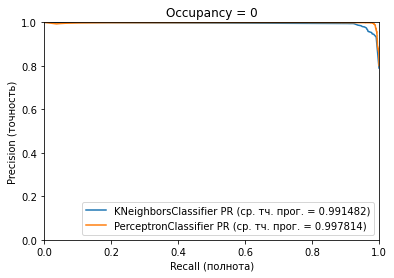

In [174]:
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn[:,0])
aps_knn0 = average_precision_score(y_test_invers,probas_knn[:,0])
plt.plot(recall, precision, label='KNeighborsClassifier PR (ср. тч. прог. = %f)' % (aps_knn0)) 

# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_slf[:,0])
aps_ptron0 = average_precision_score(y_test_invers,probas_slf[:,0])
plt.plot(recall, precision, label='PerceptronClassifier PR (ср. тч. прог. = %f)' % (aps_ptron0)) 

# вывод графика
plt.xlabel('Recall (полнота)')
plt.ylabel('Precision (точность)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

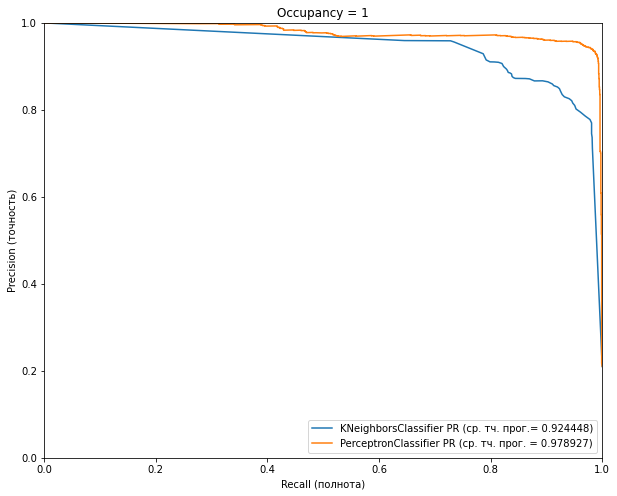

In [175]:
plt.figure(figsize=(10,8))

# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn[:,1])
aps_knn1 = average_precision_score(y_test,probas_knn[:,1])
plt.plot(recall, precision, label='KNeighborsClassifier PR (ср. тч. прог.= %f)' % (aps_knn1)) 

# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf[:,1])
aps_ptron1 = average_precision_score(y_test,probas_slf[:,1])
plt.plot(recall, precision, label='PerceptronClassifier PR (ср. тч. прог. = %f)' % (aps_ptron1)) 

# вывод графика
plt.xlabel('Recall (полнота)')
plt.ylabel('Precision (точность)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

### ROC графики

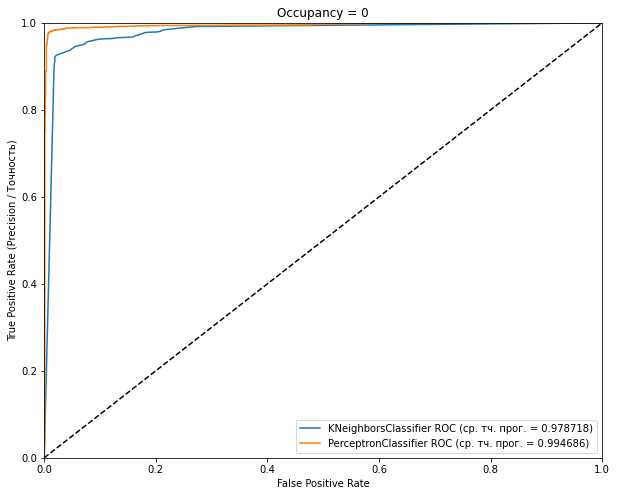

In [176]:
#TPR тоже самое что и Precision, те точноть
plt.figure(figsize=(10,8))

# K соседей
tpr, fpr, thresholds = roc_curve(y_test, probas_knn[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNeighborsClassifier ROC (ср. тч. прог. = %f)' % (roc_auc)) 

# Персептрон
tpr, fpr, thresholds = roc_curve(y_test, probas_slf[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='PerceptronClassifier ROC (ср. тч. прог. = %f)' % (roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Precision / Точность)')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

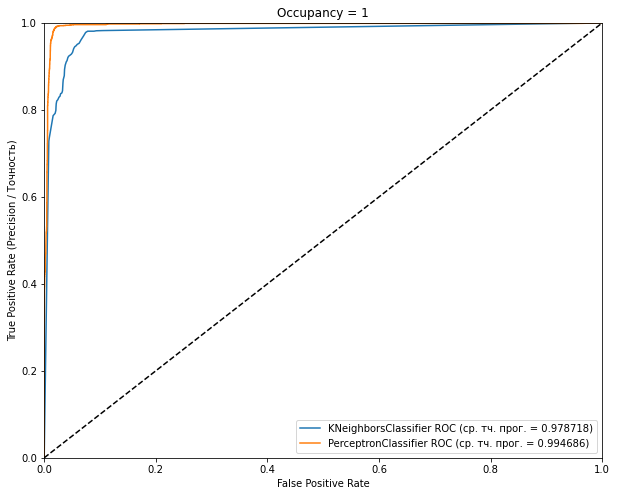

In [177]:
plt.figure(figsize=(10,8))

# K соседей
fpr, tpr, thresholds = roc_curve(y_test, probas_knn[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNeighborsClassifier ROC (ср. тч. прог. = %f)' % (roc_auc))

# PerceptronClassifier
fpr, tpr, thresholds = roc_curve(y_test, probas_slf[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='PerceptronClassifier ROC (ср. тч. прог. = %f)' % (roc_auc)) 

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Precision / Точность)')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

## 9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.
Данные классификаторы решают задачу классификации с высокой вероятностью, что является хорошим результатом, т.к. классов всего 2. Персептрон дает лучший результат, благодаря хорошо подобранным параметрам и многослойной сетке. Поэтому задача классификации была решена корректно.